# Estimación del precio de una vivienda 

En este trabajo haremos un análisis exploratorio de la base de datos de viviendas [House Sales in King COunty, USA](https://www.kaggle.com/harlfoxem/housesalesprediction) y posteriormente aplicar técnicas de machine learning sobre ellos. 

Para cada vivienda, se tienen los siguientes atributos, características o features (o descriptores, o dimensiones...):

| Atributo | descripción |
| :- |:- |
|*id*| identificador de la vivienda|
| *date*| fecha
| *price*| precio
| *bedrooms*| número de habitaciones
| *bathrooms*| número de baños/aseos
| *sqtf_living*| superficie habitable (en pies al cuadrado)
| *sqft_lot*| superficie de la parcela (en pies al cuadrado)
| *floors*| número de plantas
| *waterfront*| indica si la vivienda tiene acceso a un lago
| *view*| tipo de vista (variable numérica)
| *condition*| condición de la vivienda (variable númerica)
| *grade*| medida de la calidad de la construcción (variable numérica)
| *sqft_above*| superficie por encima del suelo (en pies al cuadrado)
| *sqft_basement*| superficie del sótano (en pies al cuadrado)
| *yr_built*| año de construcción de la vivienda
| *yr_renovated*| año de renovación de la vivienda
| *lat*| latitud de la parcela
| *long*| longitud de la parcela
| *sqft_living15*| superficie habitable promedio de los 15 vecinos más cercanos 				
| *sqft_lot15*| superficie de la parcela promedio de los 15 vecinos más cercanos

Vamos a utilizar **DataFrames** de [Pandas](http://pandas.pydata.org/). Como es sabido, Pandas es un módulo de python de código abierto para el análisis de datos, que proporciona estructuras de datos fáciles de utilizar. Como guía de referencia básica, puede consultarse la [cheat sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)

Cargamos librerías necesarias 

In [1]:
import numpy  as np  
import pandas as pd
import seaborn as sns 

import matplotlib.pyplot as plt 
%matplotlib inline

# 1. Análisis Descriptivo

Leemos el dataset como un csv

In [2]:
house_data = pd.read_csv("kc_house_data.csv") 
house_data.head()      

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Cantidad de valores faltantes

En primer lugar estudiaremos la existencia de valores faltantes para más adelante imputarlos con la media en caso de sean variables cuantitativas o con la moda en caso de que sean cualitativas.

In [3]:
house_data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Podemos observar que **ninguna de las variables tiene valores faltantes** por tanto no será necesario realizar ningún tratamiento.

## Tipo de variables

Para poder ver el tipo de las variables del conjunto de datos hacemos uso del comando `dtypes`

In [4]:
house_data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

Vemos que todas las variables son de tipo cuantitativo, donde algunas serán discretas y otras continuas, la única variable categórica sería `id` la cual seguramente acabemos eliminando ya que no nos aporta información relevate.

## Distribución de sus valores

Para ver cómo se distribuyen los precios utilizaremos `value_counts()` y los representaremos en un `histograma`. Al haber tantos precios distintos únicamente representaremos los 40 primeros precios más altos para así ver gráficamente su distribución. 

In [5]:
house_data['price'].value_counts()

450000.0    172
350000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
641500.0      1
575950.0      1
674250.0      1
608700.0      1
884744.0      1
Name: price, Length: 4028, dtype: int64

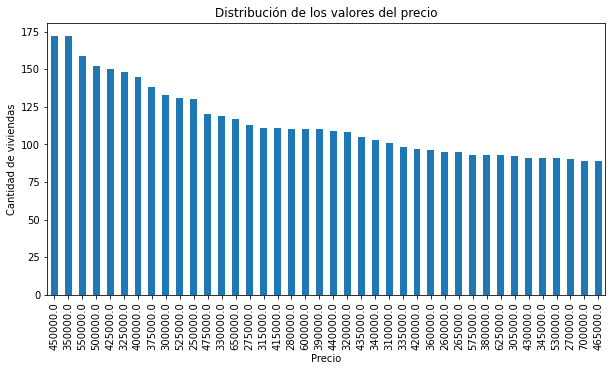

In [6]:
house_data['price'].value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Distribución de los valores del precio")
plt.ylabel('Cantidad de viviendas')
plt.xlabel('Precio');

## Matriz de correlaciones

Antes de hacer la matriz de correlaciones recordamos que todas las variables son de tipo cuantitativo, así que no tendremos que codificar ninguna de ellas. Por otro lado, los atributos `id` y `date` no aportan información, por tanto las eliminamos.

In [7]:
house_data = house_data.drop(['id','date'], axis=1)
house_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Además será necesario transformar las variables que se encuentran en la unidad de medida 'pies' a 'metros cuadrados' para así tener una mejor referencia de las dimensiones.

In [8]:
feetFeatures = ['sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15']
house_data[feetFeatures] = house_data[feetFeatures].apply(lambda x: x * 0.3048 * 0.3048)

house_data.columns = ['price','bedrooms','bathrooms','sqm_living','sqm_lot','floors','waterfront','view','condition',
                      'grade','sqm_above','sqm_basement','yr_built','yr_renovated','zip_code','lat','long',
                      'sqm_living15','sqm_lot15']

Visualizamos si la conversión se ha hecho correctamente:

In [9]:
house_data.head(5)

,price,bedrooms,bathrooms,sqm_living,sqm_lot,floors,waterfront,view,condition,grade,sqm_above,sqm_basement,yr_built,yr_renovated,zip_code,lat,long,sqm_living15,sqm_lot15
0,221900.0,3,1.00,109.625587,524.902176,1.0,0,0,3,7,109.625587,0.000000,1955,0,98178,47.5112,-122.257,124.490074,524.902176
1,538000.0,3,2.25,238.760813,672.803816,2.0,0,0,3,7,201.599597,37.161216,1951,1991,98125,47.7210,-122.319,157.006138,709.686323
2,180000.0,2,1.00,71.535341,929.030400,1.0,0,0,3,6,71.535341,0.000000,1933,0,98028,47.7379,-122.233,252.696269,748.984308
3,604000.0,4,3.00,182.089958,464.515200,1.0,0,0,5,7,97.548192,84.541766,1965,0,98136,47.5208,-122.393,126.348134,464.515200
4,510000.0,3,2.00,156.077107,750.656563,1.0,0,0,3,8,156.077107,0.000000,1987,0,98074,47.6168,-122.045,167.225472,697.051509


Para crear la matriz de correlaciones nos quedaremos con las variables continuas, descartando así las discretas como podrían ser: `waterfornt` o `view`

In [10]:
CM=house_data.iloc[:,[0,3,4,10,11,15,16,17,18]]

In [11]:
plt.figure(figsize=(10,5))
correlaciones= CM.corr()
correlaciones

,price,sqm_living,sqm_lot,sqm_above,sqm_basement,lat,long,sqm_living15,sqm_lot15
price,1.000000,0.702035,0.089661,0.605567,0.323816,0.307003,0.021626,0.585379,0.082447
sqm_living,0.702035,1.000000,0.172826,0.876597,0.435043,0.052529,0.240223,0.756420,0.183286
sqm_lot,0.089661,0.172826,1.000000,0.183512,0.015286,-0.085683,0.229521,0.144608,0.718557
sqm_above,0.605567,0.876597,0.183512,1.000000,-0.051943,-0.000816,0.343803,0.731870,0.194050
sqm_basement,0.323816,0.435043,0.015286,-0.051943,1.000000,0.110538,-0.144765,0.200355,0.017276
lat,0.307003,0.052529,-0.085683,-0.000816,0.110538,1.000000,-0.135512,0.048858,-0.086419
long,0.021626,0.240223,0.229521,0.343803,-0.144765,-0.135512,1.000000,0.334605,0.254451
sqm_living15,0.585379,0.756420,0.144608,0.731870,0.200355,0.048858,0.334605,1.000000,0.183192
sqm_lot15,0.082447,0.183286,0.718557,0.194050,0.017276,-0.086419,0.254451,0.183192,1.000000


<Figure size 720x360 with 0 Axes>

Podemos ver como es lógico que los metros cuadrados de la vivienda en su totalidad (`sqm_living`) tengan una alta correlación con el precio (`price`)

Observamos la matriz de correlaciones con un mapa de calor

<Figure size 720x360 with 0 Axes>

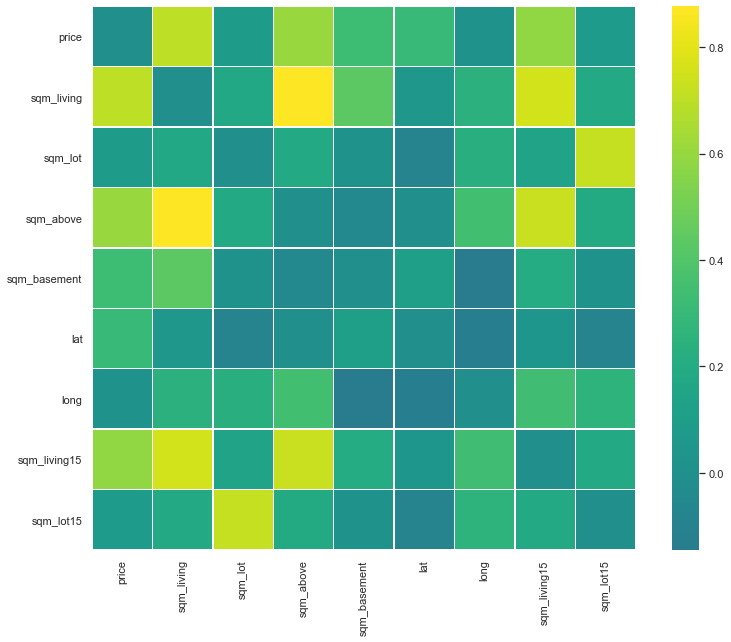

'Gráfico de correlación usando coeficiente de pearson'

In [12]:
plt.figure(figsize=(10,5))
correlaciones= CM.corr()
def get_corr_matrix(dataset = None, metodo='pearson', size_figure=[13,10]):
    # Para obtener la correlación de Spearman, sólo cambiar el metodo por 'spearman'

    if dataset is None:
        print(u'\nHace falta pasar argumentos a la función')
        return 1
    sns.set(style="white")
    # Compute the correlation matrix
    corr = dataset.corr(method=metodo) 
    # Set self-correlation to zero to avoid distraction
    for i in range(corr.shape[0]):
        corr.iloc[i, i] = 0
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=size_figure)
    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, center=0,
                square=True, linewidths=.5,  cmap ='viridis' ) #cbar_kws={"shrink": .5}
    plt.show()
    
    return ('Gráfico de correlación usando coeficiente de' + ' ' + metodo)

get_corr_matrix(CM,'pearson',[13,10])

# 2. Tratamiento de missings y outliers

### Missings

In [13]:
house_data.isnull().sum()

price           0
bedrooms        0
bathrooms       0
sqm_living      0
sqm_lot         0
floors          0
waterfront      0
view            0
condition       0
grade           0
sqm_above       0
sqm_basement    0
yr_built        0
yr_renovated    0
zip_code        0
lat             0
long            0
sqm_living15    0
sqm_lot15       0
dtype: int64

Como hemos visto previamente no es necesario imputar valores faltantes ya que este conjunto de datos no contienen ninguno.

### Outliers

En primer lugar visualizaremos la longitud del conjunto de datos para así tener una referencia:

In [14]:
len(house_data)

21613

Vamos a crear una función que nos elimine los outliers, pero de tal forma que vaya recorriendo las filas detectando la cantidad de outliers que tiene y si se considera que hay más de 4 eliminar directamente la observación.
Por esta razón es importante visualizar la longitud del data set previamente para comparar cómo varía su dimesión una vez eliminados los outliers.

In [15]:
def filtrar_outlier_tukey(x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3 - q1 
    print("[q1=%f, q3=%f, iqr=%f]" % (q1, q3, iqr))
    
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5*iqr
    print("[floor=%f, ceiling=%f]" % (floor, ceiling))
    
    outlier_indices = list(x.index[(x < floor)|(x > ceiling)])
    outlier_values = list(x[outlier_indices])

    return outlier_indices, outlier_values

In [16]:
l=list(house_data.columns.values)
for i in range(19):
    outlier_indices, outlier_values = filtrar_outlier_tukey(house_data[l[i]])
for i in range(19):
    contador=0
    borrar=0
    j=0
    while j<=(i+1)*18:
        if outlier_indices[j] in range(i*19, 19+(i)*19):
            contador=contador+1
            j=j+1
        else:
            j=j+1
        if contador>=4:
            if borrar==0:
                house_data.drop([i], axis=0, inplace=True)
            borrar=1
house_data

[q1=321950.000000, q3=645000.000000, iqr=323050.000000]
[floor=-162625.000000, ceiling=1129575.000000]
[q1=3.000000, q3=4.000000, iqr=1.000000]
[floor=1.500000, ceiling=5.500000]
[q1=1.750000, q3=2.500000, iqr=0.750000]
[floor=0.625000, ceiling=3.625000]
[q1=132.572638, q3=236.902752, iqr=104.330114]
[floor=-23.922533, ceiling=393.397923]
[q1=468.231322, q3=992.947692, iqr=524.716370]
[floor=-318.843233, ceiling=1780.022246]
[q1=1.000000, q3=2.000000, iqr=1.000000]
[floor=-0.500000, ceiling=3.500000]
[q1=0.000000, q3=0.000000, iqr=0.000000]
[floor=0.000000, ceiling=0.000000]
[q1=0.000000, q3=0.000000, iqr=0.000000]
[floor=0.000000, ceiling=0.000000]
[q1=3.000000, q3=4.000000, iqr=1.000000]
[floor=1.500000, ceiling=5.500000]
[q1=7.000000, q3=8.000000, iqr=1.000000]
[floor=5.500000, ceiling=9.500000]
[q1=110.554618, q3=205.315718, iqr=94.761101]
[floor=-31.587034, ceiling=347.457370]
[q1=0.000000, q3=52.025702, iqr=52.025702]
[floor=-78.038554, ceiling=130.064256]
[q1=1951.000000, q3=199

,price,bedrooms,bathrooms,sqm_living,sqm_lot,floors,waterfront,view,condition,grade,sqm_above,sqm_basement,yr_built,yr_renovated,zip_code,lat,long,sqm_living15,sqm_lot15
0,221900.0,3,1.00,109.625587,524.902176,1.0,0,0,3,7,109.625587,0.000000,1955,0,98178,47.5112,-122.257,124.490074,524.902176
1,538000.0,3,2.25,238.760813,672.803816,2.0,0,0,3,7,201.599597,37.161216,1951,1991,98125,47.7210,-122.319,157.006138,709.686323
2,180000.0,2,1.00,71.535341,929.030400,1.0,0,0,3,6,71.535341,0.000000,1933,0,98028,47.7379,-122.233,252.696269,748.984308
4,510000.0,3,2.00,156.077107,750.656563,1.0,0,0,3,8,156.077107,0.000000,1987,0,98074,47.6168,-122.045,167.225472,697.051509
6,257500.0,3,2.25,159.328714,633.505830,2.0,0,0,3,7,159.328714,0.000000,1995,0,98003,47.3097,-122.327,207.917004,633.505830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,142.141651,105.073338,3.0,0,0,3,8,142.141651,0.000000,2009,0,98103,47.6993,-122.346,142.141651,140.190687
21609,400000.0,4,2.50,214.606022,540.045372,2.0,0,0,3,8,214.606022,0.000000,2014,0,98146,47.5107,-122.362,170.012563,668.901888
21610,402101.0,2,0.75,94.761101,125.419104,2.0,0,0,3,7,94.761101,0.000000,2009,0,98144,47.5944,-122.299,94.761101,186.456401
21611,400000.0,3,2.50,148.644864,221.852460,2.0,0,0,3,8,148.644864,0.000000,2004,0,98027,47.5345,-122.069,130.993286,119.566212


Vemos que ha eliminado 5 filas, por tanto había 5 observaciones que tenían más de 4 outliers

# 3. Transformación de variables

En este apartado transformaremos las variables

Para poder determinar la influencia de las variables sobre la variable objetivo obtenemos un mapa de calor con las correlaciones del precio con el resto de variables:

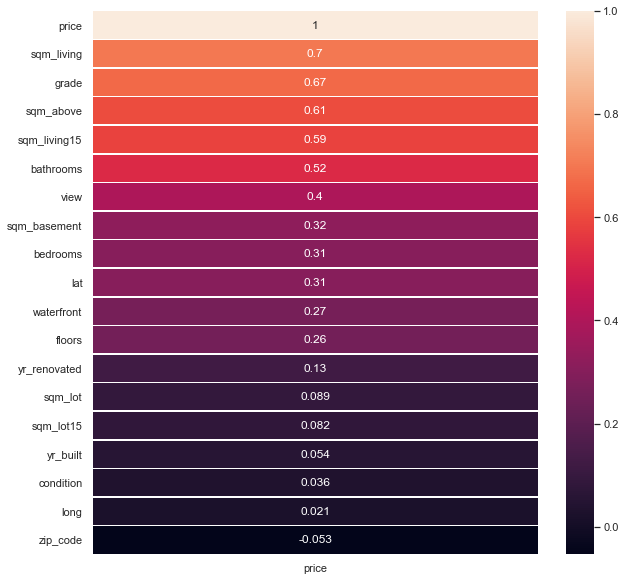

In [17]:
corr = house_data.corr()[['price']].sort_values(by='price', ascending=False)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, annot=True,linewidths=.5, ax=ax)

Hay algunas variables como por ejemplo `yr_renovated`, `sqm_lot`,`sqm_lot15`,`condition`,`yr_built` y `zip_code` que tienen correlaciones muy bajas con la variable precio, por lo que no serán muy útiles en el estudio y las eliminamos. 

Otras variables como `sqm_above` y `sqm_basement` sumadas nos dan `sqm_living`que ya la estamos conservando

In [18]:
house_data = house_data.drop(['sqm_above','sqm_basement','sqm_lot','yr_renovated','sqm_lot15','condition','zip_code','yr_built'],axis=1) 

Ciertas variables como `bedrooms` ,`bathrooms` y `sqm_living15` las eliminaremos ya que son parte de los metros cuadrados de la vivienda y no será útil tenerlas en cuenta ya que vemos que tienen una correlación alta con `sqm_living` por lo que sería redundante mantenerlas

In [19]:
house_data.corr()

,price,bedrooms,bathrooms,sqm_living,floors,waterfront,view,grade,lat,long,sqm_living15
price,1.000000,0.308258,0.524985,0.701968,0.256863,0.266401,0.397343,0.667360,0.306960,0.021489,0.585287
bedrooms,0.308258,1.000000,0.515839,0.576720,0.175435,-0.006587,0.079526,0.356942,-0.009064,0.129476,0.391639
bathrooms,0.524985,0.515839,1.000000,0.754551,0.500960,0.063769,0.187815,0.664895,0.024435,0.222969,0.568436
sqm_living,0.701968,0.576720,0.754551,1.000000,0.354168,0.103859,0.284729,0.762596,0.052349,0.240039,0.756256
floors,0.256863,0.175435,0.500960,0.354168,1.000000,0.023685,0.029395,0.458367,0.049520,0.125421,0.280087
waterfront,0.266401,-0.006587,0.063769,0.103859,0.023685,1.000000,0.401856,0.082795,-0.014280,-0.041917,0.086506
view,0.397343,0.079526,0.187815,0.284729,0.029395,0.401856,1.000000,0.251386,0.006143,-0.078417,0.280582
grade,0.667360,0.356942,0.664895,0.762596,0.458367,0.082795,0.251386,1.000000,0.113990,0.198186,0.713064
lat,0.306960,-0.009064,0.024435,0.052349,0.049520,-0.014280,0.006143,0.113990,1.000000,-0.135638,0.048627
long,0.021489,0.129476,0.222969,0.240039,0.125421,-0.041917,-0.078417,0.198186,-0.135638,1.000000,0.334441


In [20]:
house_data = house_data.drop(['bedrooms','bathrooms','sqm_living15'], axis=1) 

La `latitud` y la `longitud` podrían llegar a ser importantes ya que marca dónde se sitúa la vivienda, haremos un estudio más detallado para tratar de explicar su importancia.

Creamos intervalos para dividir las latitudes y longitudes en sectores de la ciudad:

In [21]:
house_data2=house_data.copy()

In [22]:
bins = [47.1559,47.27,47.39,47.51,47.63,47.7776]
names = ["1", "2", "3", "4", "5"]
house_data2["lat"] = pd.cut(house_data2["lat"], bins, labels = names)

In [23]:
bins2 = [-122.519,-122.41,-122.30,-122.19,-122.08,-121.97,-121.86,-121.75,-121.64,-121.53,-121.42,-121.315]
names2 = ["A", "B", "C", "D", "E","F","G","H","I","J","K"]
house_data2["long"] = pd.cut(house_data2["long"], bins2, labels = names2)

In [24]:
house_data2.groupby(by=['lat','long']).mean()

price  sqm_living    floors  waterfront      view     grade
lat long                                                                    
1   A              NaN         NaN       NaN         NaN       NaN       NaN
    B     3.068712e+05  188.835751  1.583333    0.000000  0.000000  7.666667
    C     2.887199e+05  189.022679  1.713768    0.000000  0.065217  7.623188
    D     4.587458e+05  239.209844  1.416667    0.000000  1.583333  7.833333
    E     3.085171e+05  167.249476  1.327751    0.000000  0.660287  7.157895
    F     3.858182e+05  204.597831  1.340909    0.000000  0.636364  7.272727
    G              NaN         NaN       NaN         NaN       NaN       NaN
    H              NaN         NaN       NaN         NaN       NaN       NaN
    I              NaN         NaN       NaN         NaN       NaN       NaN
    J              NaN         NaN       NaN         NaN       NaN       NaN
    K              NaN         NaN       NaN         NaN       NaN       NaN
2   A     4.821811e+05  184.950246  1.515152    0.242424  1.363636  7.242424
    B     2.919797e+05  178.236314  1.296894    0.016726  0.250896  7.510155
    C     2.742487e+05  172.503512  1.379012    0.000000  0.065432  7.214815
    D     3.106431e+05  186.871562  1.513125    0.000000  0.037500  7.528750
    E     3.524208e+05  193.841783  1.728676    0.000000  0.032353  7.510294
    F     4.089730e+05  193.618381  1.318182    0.000000  0.227273  7.363636
    G              NaN         NaN       NaN         NaN       NaN       NaN
    H              NaN         NaN       NaN         NaN       NaN       NaN
    I              NaN         NaN       NaN         NaN       NaN       NaN
    J              NaN         NaN       NaN         NaN       NaN       NaN
    K              NaN         NaN       NaN         NaN       NaN       NaN
3   A     4.896502e+05  170.428415  1.369048    0.190476  0.988095  7.261905
    B     3.545116e+05  163.656636  1.192073    0.028049  0.425610  6.946341
    C     2.945125e+05  164.194068  1.271050    0.003460  0.211073  7.002307
    D     3.607313e+05  189.823965  1.454396    0.000000  0.019721  7.410025
    E     5.296176e+05  242.002842  1.445876    0.000000  0.082474  7.989691
    F     5.995281e+05  231.560827  1.406250    0.000000  0.000000  7.937500
    G     4.136479e+05  179.861541  1.445946    0.000000  0.222973  7.472973
    H     4.999883e+05  221.240963  1.626866    0.000000  0.358209  8.074627
    I              NaN         NaN       NaN         NaN       NaN       NaN
    J              NaN         NaN       NaN         NaN       NaN       NaN
    K     5.250000e+05  195.096384  2.000000    0.000000  0.000000  9.000000
4   A     5.704267e+05  152.801053  1.736842    0.000000  0.105263  7.684211
    B     4.954113e+05  155.878888  1.510339    0.003181  0.327678  7.274125
    C     8.117461e+05  212.953066  1.502717    0.018720  0.444444  7.894324
    D     7.348375e+05  238.512873  1.402800    0.011200  0.414400  8.352000
    E     6.675632e+05  238.391430  1.818766    0.008569  0.146530  8.529563
    F     5.973203e+05  258.404707  1.842988    0.000000  0.295732  8.112805
    G     4.409578e+05  183.608374  1.591398    0.000000  0.387097  7.150538
    H     3.199042e+05  123.870720  1.333333    0.000000  0.000000  6.000000
    I              NaN         NaN       NaN         NaN       NaN       NaN
    J              NaN         NaN       NaN         NaN       NaN       NaN
    K              NaN         NaN       NaN         NaN       NaN       NaN
5   A     1.103951e+06  257.390317  1.447368    0.026316  1.289474  9.000000
    B     5.783655e+05  164.237284  1.535629    0.000266  0.206860  7.423558
    C     7.090301e+05  206.845763  1.408811    0.015369  0.326844  7.791496
    D     6.230155e+05  217.422472  1.516152    0.002809  0.063202  8.082865
    E     6.590934e+05  244.628924  1.658585    0.002621  0.068152  8.452163
    F     4.543173e+05  201.446885  1.600858    0.000000  0.085837  7.454936
    G     3.4

Podemos ver cómo en el sector 4 y 5 de la ciudad (que buscando las coordenadas en un mapa se corresponde con la parte norte de ésta), tiene viviendas de un precio mucho más elevado que en otros sectores. En general también se ven  diferencias en cuanto al este y oeste de la ciudad dentro de una misma latitud. Podemos cocluir que el precio de las viviendas es mayor o menor en gran parte por su ubicación.
Por tanto será necesario conservar ambas variables a pesar de que la longitud en principio tenga una correlación baja.

En los siguientes box plots se observa como claramente hay sectores donde los precios son mucho mayores que en otros, como hemos comentado antes, se ve en el sector 4 y 5 en el caso de la latitud. En cambio en la longitud vemos que la zona C tiene precios mucho mayores que la zona F por ejemplo.

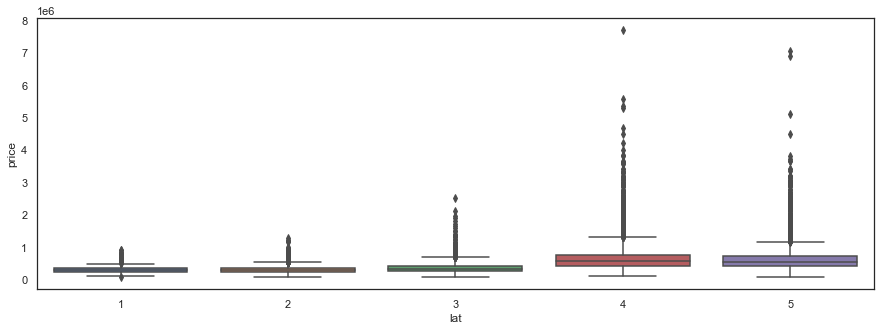

In [25]:
plt.figure(figsize=(15,5))
sns.boxplot(x='lat',y='price',data=house_data2)

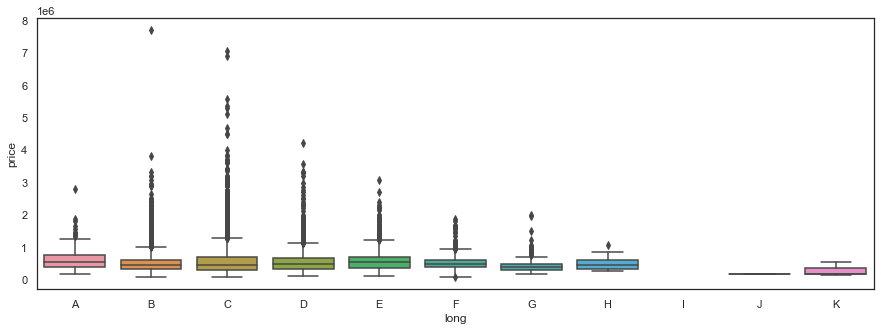

In [26]:
plt.figure(figsize=(15,5))
sns.boxplot(x='long',y='price',data=house_data2)

Este será el nuevo dataset con el trabajaremos de cara a los modelos una vez hecha la limpieza de variables:

In [27]:
house_data.head()

,price,sqm_living,floors,waterfront,view,grade,lat,long
0,221900.0,109.625587,1.0,0,0,7,47.5112,-122.257
1,538000.0,238.760813,2.0,0,0,7,47.7210,-122.319
2,180000.0,71.535341,1.0,0,0,6,47.7379,-122.233
4,510000.0,156.077107,1.0,0,0,8,47.6168,-122.045
6,257500.0,159.328714,2.0,0,0,7,47.3097,-122.327


# 4. Datos de train y test

En primer lugar creamos los subconjuntos de train y test para poder entrenar el modelo:

Para la `X` tomamos las columnas asociadas a la variables que nos hemos quedado en la tabla final.

`y` será la variable a predecir: `price`

In [28]:
Price=house_data['price'].values
X=house_data.iloc[:,[1,2,3,4,5,6,7]].values
y=Price

Haremos una subdivisión con un train del 80% y un test del 20%

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [30]:
X_train.shape,X_test.shape

((17286, 7), (4322, 7))

# 5. Algoritmos de Clasificación

A continuación vamos a llevar a cabo los algoritmos de clasificación, donde inlcuiremos en cada uno de ellos las métricas elegidas. Además utilizando el comando `.score` veremos cómo de bueno ha sido el entrenamiento en cada modelo.

En primer lugar estandarizamos las variables para los métodos en los que sea necesario, e importamos las librerías para las diferentes métricas que posteriormente utilizaremos en cada uno de ellos.

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Estás son las métricas elegidas, las cuales explicamos brevemente antes de su uso para facilitar su interpretación:

In [32]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import max_error
import math

#### R² Score

El R² score es el coeficiente de determinación, que mide la bondad de ajuste del modelo, es decir, mide lo bien que un modelo de regresión se ajusta a los datos reales.
El resultado del coeficiente oscila entre 0 y 1. Cuanto más cerca de 1 se sitúe su valor, mayor será el ajuste del modelo a la variable que estamos intentando explicar. De forma inversa, cuanto más cerca de cero, menos ajustado estará el modelo y, por tanto, menos fiable será. 
**Esta métrica solo se puede utilizar para modelos lineales por tanto solo la añadiremos al modelo de regresión lineal.**

#### MAE

El error absoluto medio es el promedio de la diferencia absoluta entre el valor observado y los valores predichos. 
El error se calcula como un promedio de diferencias absolutas entre los valores objetivo y las predicciones. Es una puntuación lineal, lo que significa que todas las diferencias individuales se ponderan por igual en el promedio.
Por tanto cuanto menor sea este valor mejor será el modelo.

#### MSE

MSE básicamente mide el error cuadrado promedio de nuestras predicciones. Para cada punto, calcula la diferencia cuadrada entre las predicciones y el objetivo y luego promedia esos valores.
Cuanto mayor sea este valor, peor es el modelo. Nunca es negativo, ya que estamos cuadrando los errores de predicción individuales antes de sumarlos, pero sería cero para un modelo perfecto.

#### RMSE

Se calcula tomando la raíz cuadrada de MSE. Es conocida también como la desviación cuadrática media. Mide la magnitud promedio de los errores y se ocupa de las desviaciones del valor real.
Cuanto menor sea el RMSE, mejor será el modelo y sus predicciones.

#### MAPE

El error porcentual absoluto medio (MAPE) expresa la exactitud como un porcentaje del error. Debido a que el MAPE es un porcentaje, puede ser más fácil de interpretar que otros estadísticos de medición. Por ejemplo, si el MAPE es 5, en promedio, el pronóstico está equivocado en un 5%. De forma general se considera un buen valor de MAPE si se encuentra por debajo del 20%.

#### MAX ERROR

Esta métrica nos da el máximo error entre el dato real y la predicción. Es una buena referencia para saber en el peor de los casos, cuánto varía la estimación del valor real.

## Regresión lineal

In [33]:
from sklearn.linear_model import LinearRegression
regresor= LinearRegression()
regresor.fit(X_train, y_train)
y_pred=regresor.predict(X_test)

In [34]:
regresor.score(X_train,y_train)

0.6638870926861489

In [35]:
regresor.score(X_test,y_test)

0.6542244187175976

In [36]:
r2=r2_score(y_test,y_pred)
print('r2_score: ', r2)

r2_score:  0.6542244187175976


In [37]:
# R2 Ajustado
n = len(y_test) # Cantidad de Filas del test
k = X_test.shape[1] #Cantidad de Columnas (variables independientes)
r2_adj = 1-((1-r2)*(n-1)/(n-k-1))
print(r2_adj)

0.6536633549556652


In [38]:
mae=mean_absolute_error(y_test,y_pred)
mae

135317.50264774577

In [39]:
mape = mean_absolute_percentage_error(y_test, y_pred)
mape

0.266676572080253

In [40]:
mse=mean_squared_error(y_test,y_pred)
mse

46906572681.47991

In [41]:
RMSE = math.sqrt(mse)
RMSE

216579.25265703525

In [42]:
max_e=max_error(y_test, y_pred)
max_e

2774087.607673023

## KNN

In [43]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=10,metric='manhattan')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [44]:
knn.score(X_train,y_train)

0.8662790884914542

In [45]:
knn.score(X_test,y_test)

0.8393849028577082

In [46]:
mae=mean_absolute_error(y_test,y_pred)
mae

80807.7689495604

In [47]:
mape = mean_absolute_percentage_error(y_test, y_pred)
mape

0.14821465318623298

In [48]:
mse=mean_squared_error(y_test,y_pred)
mse

21788420396.56573

In [49]:
RMSE = math.sqrt(mse)
RMSE

147609.0119083714

In [50]:
max_e=max_error(y_test, y_pred)
max_e

2249970.0

## Árbol de decisión

In [51]:
from sklearn.tree import DecisionTreeRegressor
arbol = DecisionTreeRegressor(max_depth=8)
arbol.fit(X_train,y_train)
y_pred = arbol.predict(X_test)

In [52]:
arbol.score(X_train,y_train)

0.858774783627144

In [53]:
arbol.score(X_test,y_test)

0.829312526380757

In [54]:
mae=mean_absolute_error(y_test,y_pred)
mae

92173.18405967715

In [55]:
mape = mean_absolute_percentage_error(y_test, y_pred)
mape

0.17410107071109404

In [56]:
mse=mean_squared_error(y_test,y_pred)
mse

23154799877.55479

In [57]:
RMSE = math.sqrt(mse)
RMSE

152167.01310584627

In [58]:
max_e=max_error(y_test, y_pred)
max_e

1501403.5

## Bagging

In [59]:
from sklearn.ensemble import BaggingRegressor
bag=BaggingRegressor(base_estimator=None, n_estimators=10)
bag.fit(X_train,y_train)
y_pred = bag.predict(X_test)

In [60]:
bag.score(X_train,y_train)

0.9759856177040025

In [61]:
bag.score(X_test,y_test)

0.8731085837238612

In [62]:
mae=mean_absolute_error(y_test,y_pred)
mae

75083.3120121857

In [63]:
mape = mean_absolute_percentage_error(y_test, y_pred)
mape

0.14211706722492434

In [64]:
mse=mean_squared_error(y_test,y_pred)
mse

17213596802.11618

In [65]:
RMSE = math.sqrt(mse)
RMSE

131200.59756767948

In [66]:
max_e=max_error(y_test, y_pred)
max_e

1504300.0

## Random Forest

In [67]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(n_estimators=100, random_state=0)
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)

In [68]:
RF.score(X_train,y_train)

0.9815573665716123

In [69]:
RF.score(X_test,y_test)

0.887062379441023

In [70]:
mae=mean_absolute_error(y_test,y_pred)
mae

70999.74169205726

In [71]:
mape = mean_absolute_percentage_error(y_test, y_pred)
mape

0.13495325681920423

In [72]:
mse=mean_squared_error(y_test,y_pred)
mse

15320679058.873331

In [73]:
RMSE = math.sqrt(mse)
RMSE

123776.73068421759

In [74]:
max_e=max_error(y_test, y_pred)
max_e

1830848.0

## Gradient Boost

In [75]:
from sklearn.ensemble import GradientBoostingRegressor
gradb = GradientBoostingRegressor(random_state=0)
gradb.fit(X_train, y_train)
y_pred =gradb.predict(X_test)

In [76]:
gradb.score(X_train,y_train)

0.885021844963377

In [77]:
gradb.score(X_test,y_test)

0.8655426181783034

In [78]:
mae=mean_absolute_error(y_test,y_pred)
mae

81677.94180064081

In [79]:
mape = mean_absolute_percentage_error(y_test, y_pred)
mape

0.15571605618606504

In [80]:
mse=mean_squared_error(y_test,y_pred)
mse

18239966308.754173

In [81]:
RMSE = math.sqrt(mse)
RMSE

135055.4193979426

In [82]:
max_e=max_error(y_test, y_pred)
max_e

1539957.49551126

## XGBoost

In [83]:
import xgboost as xgb
import numpy as np
xgb_model = xgb.XGBRegressor(objective="reg:linear", random_state=42)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

[14:50:41] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


In [84]:
xgb_model.score(X_test,y_test)

0.8919011830096579

In [85]:
xgb_model.score(X_test,y_test)

0.8919011830096579

In [86]:
mae=mean_absolute_error(y_test,y_pred)
mae

70673.75074112101

In [87]:
mape = mean_absolute_percentage_error(y_test, y_pred)
mape

0.13428996971072296

In [88]:
mse=mean_squared_error(y_test,y_pred)
mse

14664265756.22832

In [89]:
RMSE = math.sqrt(mse)
RMSE

121096.10132546927

In [90]:
max_e=max_error(y_test, y_pred)
max_e

1892391.0

# 6. Elección final de la métrica

Observando los resultados de las distintas métricas en cada uno de los modelos debemos decantarnos por la que creamos más conveniente. Haremos las comparaciones a continuación para tomar una decisión teniendo en cuenta las ventajas y desventajas de cada una.

## Métrica elegida

### MAPE

Nos quedamos con la métrica `MAPE` (Error porcentual absoluto medio) que mide el tamaño del error en términos porcentuales.

Aun así es un valor que proviene del `MAE`, veamos sus diferencias y por qué es preferible la elección del `MAPE` antes que del `MAE`.

**Similitudes**

Dado que `MAPE` es un desarrollo posterior del cálculo `MAE`, existen algunas **similitudes clave entre ellas**:

- Ambas no son sensibles a los valores atípicos ya que usan la diferencia absoluta.
- Ambas son ampliamente utilizadas y se implementan fácilmente en Python usando sklearn.

**Diferencias**

Si bien se basan en un cálculo similar, `MAE` y `MAPE` tienen algunas **diferencias que podrían ser importantes**:

- `MAPE` es más fácil de comprender que `MAE` ya que se da como un porcentaje.

- `MAE` varía en escala según el objetivo que esté prediciendo, lo que dificulta la comparación entre modelos. Este es  un problema que no tiene el `MAPE` ya que se da en porcentaje.

- `MAPE` no se puede usar con valores reales cercanos a 0, o 0; de lo contrario, se producirá un error en la división.
  `MAE`, por otro lado, se puede usar en esta situación ya que no contiene una división en su fórmula.

**¿Por cuál nos decantamos?**

En la mayoría de los casos, `MAPE` es mejor que `MAE`, esto se debe a dos razones: 

La primera es que el porcentaje hace que sea fácil de entender tanto para los desarrolladores como para los usuarios finales, y la segunda es que las puntuaciones de `MAPE` se pueden comparar entre diferentes modelos. Sin embargo, si los datos son cercanos a 0 ó 0 **(siendo esto algo que no se da en este conjunto de datos)**, entonces `MAE` sería la opción preferida.


**Conclusión**:

Como hemos comentado previamente está métrica mide el porcentaje de error que comete cada método.

Normalmente un `MAPE` < 0.20 se considera un valor bastante bueno ya que el modelo se está equivocando en muy pocas estimaciones respecto del valor original.

Veamos los modelos que tienen un `MAPE` por debajo del 20%:

- `KNN`
- `Random Forest`
- `Bagging`
- `Gradient Boost`
- `XGBoost`
- `Árboles de decisión`

En el caso de:

- `Regresión lineal`

tiene un `MAPE` del 26%, que tampoco está muy alejado del límite de error aceptable por tanto consideramos que también es un modelo que predice suficientemente bien.


### ¿Por qué no elegir otra?

Otras opciones serían el `MSE` y el `MAX ERROR`:

En el caso de `MSE`:

El valor que se obtiene es una unidad de salida al cuadrado. 
Por ejemplo, la variable está en metros (m), la salida que obtenemos está en metros cuadrados.

Si tiene valores atípicos en el conjunto de datos, le afcetan más y el `MSE` calculado es mayor. Entonces, en resumen la ventaja se puede convertir en desventaja cuando hay una mala predicción, la sensibilidad a los valores atípicos magnifica los errores elevados al elevarlos al cuadrado.

El `RMSE` es la raíz del `MSE` pero tiene problemas parecidos: No es tan resistente a los valores atípicos en comparación con `MAE`. Además aumenta con un aumento en el tamaño de la muestra. Este es un problema cuando calculamos los resultados en diferentes muestras de prueba.

En el caso de `MAX ERROR`:

Es una métrica meramente informativa, nos enseña el mayor error que se produce pero no tenemos una referencia de cómo son el resto de errores, ni del ajuste del modelo.
Por tanto podría ser útil como métrica complementaria pero no para basarse únicamente en ella.

### Orden de los métodos de mejor a peor según MAPE :

1. `XGBoost` con MAPE = 0.1342
2. `Random Forest` con MAPE = 0.1349
3. `Bagging` con MAPE = 0.1421
4. `KNN` con MAPE = 0.1482
5. `Gradient Boost` con MAPE = 0.1557
6. `Árbol de decisión` con MAPE = 0.1740
7. `Regresión lineal` con MAPE = 0.2666

Por tanto el modelo elegido será el `XGBoost`

# 7. Importancia de las variables 

Haremos uso del modelo `XGBoost` ya que ha sido elegido cómo el modelo que mejor se ajusta a nuestro conjunto de datos.

Vemos primero en un array la importancia de las variables a la hora de predecir correctamente la variable objetivo:

Esta 'importancia' nos da una calificación de cómo de útil han sido las variables en la construcción del modelo.

In [91]:
xgb_model.feature_importances_

array([0.10642099, 0.00865697, 0.24988262, 0.05744106, 0.47295853,
       0.06819684, 0.03644305], dtype=float32)

Podemos observar como las variables `grade`,`waterfront` y `sqm_living` (en ese orden) han sido las más importantes para esta pediccióm.

Las mostramos en un gráfico de barras:

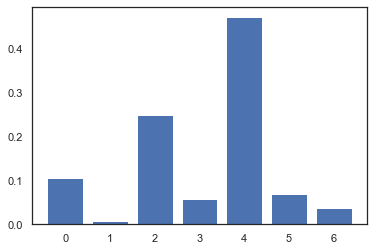

In [92]:
plt.bar(range(len(xgb_model.feature_importances_)), xgb_model.feature_importances_)
plt.show()

Teniendo en cuenta esto, si volviesemos a llevar a cabo la selección de variables, no habríamos tenido en cuenta la variable `floors` que no aporta prácticamente nada a mejorar la predicción.